In [1]:
import numpy as np

In [83]:
mode = 2

data_directory = "DATASET/mode_" + str(mode) + "/downsampling/"

X_train = np.load(data_directory + "X_train.npy")
y_train = np.load(data_directory + "y_train.npy")

X_val = np.load(data_directory + "X_val.npy")
y_val = np.load(data_directory + "y_val.npy")

X_test = np.load(data_directory + "X_test.npy")
y_test = np.load(data_directory + "y_test.npy")

In [84]:
X_train.shape

(10595, 250, 2)

In [129]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

seq_length = 250

model = Sequential()
model.add(Conv1D(64, 10, strides=1, activation='relu', input_shape=(seq_length, 2)))
model.add(BatchNormalization())
model.add(Conv1D(64, 10, strides=1, activation='relu'))
model.add(MaxPooling1D(4))
model.add(Conv1D(128, 10, strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(Conv1D(128, 10, strides=1, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [130]:
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_data=(X_val, y_val), shuffle=True)

Train on 10595 samples, validate on 2659 samples
Epoch 1/200
10595/10595 [==============================] - 5s 470us/step - loss: 0.3571 - acc: 0.8637 - val_loss: 0.3995 - val_acc: 0.8778
Epoch 2/200
10595/10595 [==============================] - 4s 339us/step - loss: 0.2989 - acc: 0.8854 - val_loss: 0.4519 - val_acc: 0.8778
Epoch 3/200
10595/10595 [==============================] - 4s 334us/step - loss: 0.2890 - acc: 0.8918 - val_loss: 0.2880 - val_acc: 0.8891
Epoch 4/200
10595/10595 [==============================] - 4s 334us/step - loss: 0.2818 - acc: 0.8964 - val_loss: 2.1191 - val_acc: 0.2569
Epoch 5/200
10595/10595 [==============================] - 4s 335us/step - loss: 0.2799 - acc: 0.8976 - val_loss: 0.2578 - val_acc: 0.9018
Epoch 6/200
10595/10595 [==============================] - 4s 344us/step - loss: 0.2705 - acc: 0.8997 - val_loss: 0.2980 - val_acc: 0.9026
Epoch 7/200
10595/10595 [==============================] - 3s 329us/step - loss: 0.2688 - acc: 0.8966 - val_loss: 0.2

10595/10595 [==============================] - 3s 313us/step - loss: 0.2119 - acc: 0.9198 - val_loss: 0.2965 - val_acc: 0.9041
Epoch 60/200
10595/10595 [==============================] - 3s 313us/step - loss: 0.2100 - acc: 0.9210 - val_loss: 0.2698 - val_acc: 0.9124
Epoch 61/200
10595/10595 [==============================] - 3s 314us/step - loss: 0.2124 - acc: 0.9214 - val_loss: 0.2782 - val_acc: 0.9139
Epoch 62/200
10595/10595 [==============================] - 3s 312us/step - loss: 0.2106 - acc: 0.9199 - val_loss: 0.3073 - val_acc: 0.9158
Epoch 63/200
10595/10595 [==============================] - 3s 313us/step - loss: 0.2092 - acc: 0.9185 - val_loss: 0.2696 - val_acc: 0.9124
Epoch 64/200
10595/10595 [==============================] - 3s 313us/step - loss: 0.2163 - acc: 0.9202 - val_loss: 0.3045 - val_acc: 0.9131
Epoch 65/200
10595/10595 [==============================] - 3s 313us/step - loss: 0.2114 - acc: 0.9202 - val_loss: 0.2885 - val_acc: 0.9146
Epoch 66/200
10595/10595 [=======

10595/10595 [==============================] - 4s 345us/step - loss: 0.1743 - acc: 0.9339 - val_loss: 0.3820 - val_acc: 0.8845
Epoch 118/200
10595/10595 [==============================] - 3s 304us/step - loss: 0.1719 - acc: 0.9345 - val_loss: 0.3240 - val_acc: 0.9146
Epoch 119/200
10595/10595 [==============================] - 3s 320us/step - loss: 0.1685 - acc: 0.9358 - val_loss: 0.3988 - val_acc: 0.9018
Epoch 120/200
10595/10595 [==============================] - 3s 313us/step - loss: 0.1728 - acc: 0.9338 - val_loss: 0.3534 - val_acc: 0.8913
Epoch 121/200
10595/10595 [==============================] - 4s 335us/step - loss: 0.1668 - acc: 0.9343 - val_loss: 0.3474 - val_acc: 0.9127
Epoch 122/200
10595/10595 [==============================] - 4s 343us/step - loss: 0.1699 - acc: 0.9354 - val_loss: 0.3517 - val_acc: 0.9127
Epoch 123/200
10595/10595 [==============================] - 3s 309us/step - loss: 0.1645 - acc: 0.9384 - val_loss: 0.3425 - val_acc: 0.9094
Epoch 124/200
10595/10595 [

10595/10595 [==============================] - 3s 325us/step - loss: 0.1313 - acc: 0.9502 - val_loss: 0.3916 - val_acc: 0.9086
Epoch 176/200
10595/10595 [==============================] - 4s 333us/step - loss: 0.1338 - acc: 0.9506 - val_loss: 0.5050 - val_acc: 0.9000
Epoch 177/200
10595/10595 [==============================] - 3s 311us/step - loss: 0.1297 - acc: 0.9519 - val_loss: 0.4631 - val_acc: 0.8917
Epoch 178/200
10595/10595 [==============================] - 3s 318us/step - loss: 0.1323 - acc: 0.9524 - val_loss: 0.4466 - val_acc: 0.9176
Epoch 179/200
10595/10595 [==============================] - 3s 314us/step - loss: 0.1299 - acc: 0.9521 - val_loss: 0.3863 - val_acc: 0.8958
Epoch 180/200
10595/10595 [==============================] - 3s 324us/step - loss: 0.1282 - acc: 0.9533 - val_loss: 0.3595 - val_acc: 0.9105
Epoch 181/200
10595/10595 [==============================] - 3s 320us/step - loss: 0.1291 - acc: 0.9521 - val_loss: 0.4216 - val_acc: 0.9101
Epoch 182/200
10595/10595 [

In [131]:
score = model.evaluate(X_val, y_val, verbose=1, batch_size=16)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

2659/2659 [==============================] - 0s 125us/step
Validation loss: 0.40423753106109894
Validation accuracy: 0.9014667168108311


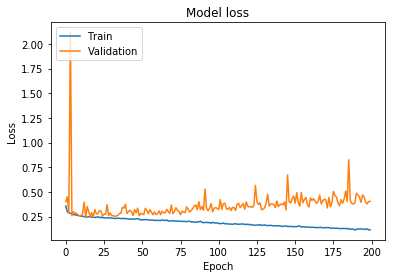

In [132]:
import matplotlib.pyplot as plt 

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [135]:
y_val_predict = (model.predict(X_val) > 0.5).astype(np.uint8)

from sklearn.metrics import recall_score, precision_score

print(precision_score(y_val, y_val_predict))
print(recall_score(y_val, y_val_predict))

0.7253012048192771
0.6703786191536748


In [137]:
model.save("Models/mode_" + str(mode) + "/conv1D.h5")